<H1> Linear Regression

A major goal of this morning's lecture was to introduce the idea of intra-subject variability and how it affects the modeling of a particular data set. We will begin by reviewing (briefly) simple linear models, and we'll discuss how to do such a fit in R. Then, we will look more closely at the Rails example from this morning.

<H2> Simple Linear Models

A simple linear model is of the form

$$y_i = \alpha + \beta x_i + \epsilon_i$$

The goal of a linear regression is to find the line

$$ y = \alpha +\beta x$$

that best fits the data. I.e. we find the line such that the sum of the squared errors is minimized. A key assumption in such a model is that the errors follow a standard normal distribution. This is important, because when this assumption is invalid, applying the standard confidence interval calculation for the slope $\beta$ will be wrong.

We will use a sample data set from R to illustrate a simple linear regression.

In [1]:
# Let's see what it looks like:
ToothGrowth

    len supp dose
1   4.2   VC  0.5
2  11.5   VC  0.5
3   7.3   VC  0.5
4   5.8   VC  0.5
5   6.4   VC  0.5
6  10.0   VC  0.5
7  11.2   VC  0.5
8  11.2   VC  0.5
9   5.2   VC  0.5
10  7.0   VC  0.5
11 16.5   VC  1.0
12 16.5   VC  1.0
13 15.2   VC  1.0
14 17.3   VC  1.0
15 22.5   VC  1.0
16 17.3   VC  1.0
17 13.6   VC  1.0
18 14.5   VC  1.0
19 18.8   VC  1.0
20 15.5   VC  1.0
21 23.6   VC  2.0
22 18.5   VC  2.0
23 33.9   VC  2.0
24 25.5   VC  2.0
25 26.4   VC  2.0
26 32.5   VC  2.0
27 26.7   VC  2.0
28 21.5   VC  2.0
29 23.3   VC  2.0
30 29.5   VC  2.0
31 15.2   OJ  0.5
32 21.5   OJ  0.5
33 17.6   OJ  0.5
34  9.7   OJ  0.5
35 14.5   OJ  0.5
36 10.0   OJ  0.5
37  8.2   OJ  0.5
38  9.4   OJ  0.5
39 16.5   OJ  0.5
40  9.7   OJ  0.5
41 19.7   OJ  1.0
42 23.3   OJ  1.0
43 23.6   OJ  1.0
44 26.4   OJ  1.0
45 20.0   OJ  1.0
46 25.2   OJ  1.0
47 25.8   OJ  1.0
48 21.2   OJ  1.0
49 14.5   OJ  1.0
50 27.3   OJ  1.0
51 25.5   OJ  2.0
52 26.4   OJ  2.0
53 22.4   OJ  2.0
54 24.5   OJ  2.0
55 24.8   

These data are the results of an experiment where 60 Guinea Pigs were divided in to 6 groups and then were given a specific dose of either vitamin C or orange juice over a period of time, and then their tooth length was measured. We'll do two separated fits: one for vitamin C and one for OJ.

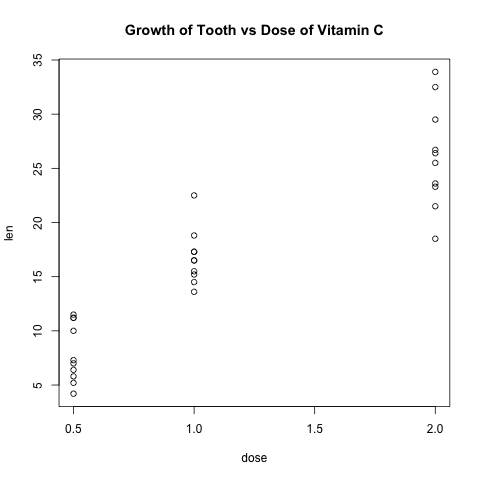

In [2]:
# Let's see a scatter plot
with(subset(ToothGrowth,  supp == "VC"), plot(dose, len))
title(main="Growth of Tooth vs Dose of Vitamin C")

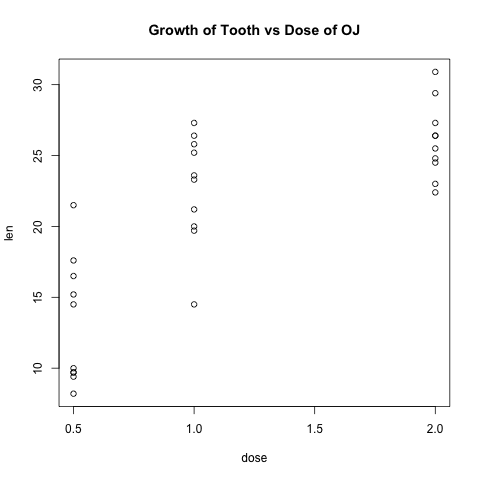

In [3]:
with(subset(ToothGrowth,  supp == "OJ"), plot(dose, len))
title(main="Growth of Tooth vs Dose of OJ")

In [4]:
# Fit for vitamin C
fit.tooth.VC<-lm(ToothGrowth$len ~ ToothGrowth$dose,subset=(ToothGrowth$supp=="VC"))
summary(fit.tooth.VC)


Call:
lm(formula = ToothGrowth$len ~ ToothGrowth$dose, subset = (ToothGrowth$supp == 
    "VC"))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2264 -2.6029  0.0814  2.2288  7.4893 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         3.295      1.427   2.309   0.0285 *  
ToothGrowth$dose   11.716      1.079  10.860 1.51e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.685 on 28 degrees of freedom
Multiple R-squared:  0.8082,	Adjusted R-squared:  0.8013 
F-statistic: 117.9 on 1 and 28 DF,  p-value: 1.509e-11


In [5]:
# Fit for vitamin C
fit.tooth.VC<-lm(len ~ dose, subset=(supp=="VC"), data=ToothGrowth)
summary(fit.tooth.VC)


Call:
lm(formula = len ~ dose, data = ToothGrowth, subset = (supp == 
    "VC"))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2264 -2.6029  0.0814  2.2288  7.4893 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.295      1.427   2.309   0.0285 *  
dose          11.716      1.079  10.860 1.51e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.685 on 28 degrees of freedom
Multiple R-squared:  0.8082,	Adjusted R-squared:  0.8013 
F-statistic: 117.9 on 1 and 28 DF,  p-value: 1.509e-11


Discussion
===============

* What is the biological hypothesis?
* What is the statistical hypothesis?
* How do we test the statistical hypothesis?
* What is your conclusion?

<H3> Look at OJ and Tooth Growth

In [ ]:
# Fit for OJ
fit.tooth.OJ<-lm(ToothGrowth$len ~ ToothGrowth$dose,subset=(ToothGrowth$supp=="OJ"))
summary(fit.tooth.OJ)

Note that the `lm` function (for linear model) takes arguments in a specific format:

$$ y\_values \sim  x\_values$$

Or more formally stated: Dependent Variable ~ Independent Variable

<H2>R Formula Syntax

A more complicated linear model might include more than one main effect and/or interaction terms such as:

$$ y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 +\epsilon$$

Below is a table of R formula syntax and the corresponding model. There are others, but that is a topic for more advanced study.


|       Syntax       | Model |
| ------------------ | ----- |
| $x_1 + x_2 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ | $y = \alpha + \beta_1 x_1 + \beta_2 x_2  +\epsilon$ |
| $x_1:x_1$ | $y = \alpha + \beta x_1 x_2 +\epsilon \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ |
| $x_1 * x_2$ | $y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 +\epsilon \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ |
| $x_1 * x_2 *x_3$ | $y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +\beta_4 x_1 x_2 +\beta_5 x_1 x_3 + \beta_6 x_2 x_3 + \beta_7 x_1 x_2 x_3 +\epsilon$ |
| $(x_1 + x_2 + x_3)^2$ | $y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +\beta_4 x_1 x_2 +\beta_5 x_1 x_3 + \beta_6 x_2 x_3 +\epsilon$ |


<H2>Work!

Load the R data set called "mtcars". 

* Perform a linear regression on mpg using cyl and hp as main effects. 
* Add wt (weight) as a third main effect.
* Add interaction terms for hp and weight


<H2> Rails Example

In [ ]:
# Rails example

# Just loading some library functions
library(nlme)
library(lattice)

# Get the dataset (it is part of R)
data(Rail)

# Look at the data
Rail

In [ ]:
#Plot the data

xyplot(travel~Rail,data=Rail,ylab="Zero-force travel time (nano-seconds)")

In [ ]:
# Linear Model ignoring random effect

fit.rails.simple<-lm(travel~1,data=Rail)
summary(fit.rails.simple)
res<-fit.rails.simple$residuals
qqnorm(res);qqline(res)


The above plot is called a 'QQ plot'. The straight line represents the quantiles of the normal distribution, while the dots are the quantiles of the residuals. If the errors were normally distributed, the dots would be close to or on the line.

Note: In this example, we are fitting a one-parameter model, i.e.

$$y_i = \alpha + \epsilon_i$$

Where $\alpha$ is the mean travel time along a rail.

In [ ]:
mean(Rail$travel)
sd(Rail$travel)

In [ ]:

# Linear Model incorporating random effect
fit.rails.mm<-lme(travel~1,random=~1|Rail,data=Rail)
summary(fit.rails.mm)
res<-fit.rails.mm$residuals

<H2>Simulation

In [ ]:
sim.ranef=function(nk,n,se,sb,verbose=FALSE)
    {
        # n exp units with nk replicates each
        N=n*nk
    
        # generate error from normal distribution with zero mean and variance se
        e=rnorm(N,0,se)
    
        # generate random effect from normal with mean zero and variance sb
        # here we get n different samples from the normal - but replicate those nk times
        b=rep(rnorm(n,0,sb),each=nk)
    
        # assigning a label to each n sample (eg. each rail), repeat nk times
        id=rep(1:n,each=nk)
    
        # Simulated output value
        y=0+e+b
    
        # create a data frame with the id, errors and outcome
        dat=data.frame(id,b,e,y)
    
    
        # fit both models: standard linear model (lm) and linear mixed effects (lme)
        mod0=summary(lm(y~1,data=dat))
        mod1=summary(lme(y~1,random=~1|id,data=dat))
        
        # extract the pvalues
        pval0=mod0$coef["(Intercept)","Pr(>|t|)"]  #each package returns a slightly different data frame
        pval1=mod1$tTable["(Intercept)","p-value"] 
       
    # Just changing output based on options passed to the function.  
       if(verbose)
            {
                out=list(dat,mod0,mod1) # This is a list data type. Basically, you can put anything into a list.
            }
        else
            {
                out=c(pval0,pval1) # Output only the p-values from the two models.
            }
        out
    }




In [ ]:
# run the first simulation

set.seed(210)

# simulate 3 measurements on each of 6 subjects

ex1=sim.ranef(3,6,0.25,0.5,verbose=TRUE)

#print the simulated data set - note that it is stored in element 1 of a list.
ex1[[1]]






In [ ]:
# plot the simultation data using xyplot (from the lattice package)
xyplot(y~id,data=ex1[[1]])

# print the output from the two fits.

ex1[[2]]
ex1[[3]]



In [ ]:
#Run the simulation 1000 times
set.seed(210)
B=1000
res=replicate(B,sim.ranef(3,6,0.25,0.5,verbose=FALSE)) #Note that verbose=FALSE means that the simulation will 
                                                                 # output only p-values

# Compute the type I error rates
mean(res[1,]<0.05) 
mean(res[2,]<0.05)


In [ ]:
par(mfrow=c(1,3))
qqplot(qunif(ppoints(500)), res[1,],cex=0.1,xlab="Uniform Distribution",ylab="lm")
abline(0,1)
qqplot(qunif(ppoints(500)), res[2,],cex=0.1,xlab="Uniform Distribution",ylab="lme")
abline(0,1)
plot(res[1,],res[2,],pch=19,cex=0.5,xlab="lm",ylab="lme")
abline(0,1)


In [ ]:
# Increase Sample size
B=1000
res=replicate(B,sim.ranef(3,50,0.25,0.5,verbose=FALSE))
mean(res[1,]<0.05)

mean(res[2,]<0.05)


par(mfrow=c(1,3))
qqplot(qunif(ppoints(500)), res[1,],cex=0.1,xlab="Uniform Distribution",ylab="lm")
abline(0,1)
qqplot(qunif(ppoints(500)), res[2,],cex=0.1,xlab="Uniform Distribution",ylab="lme")
abline(0,1)
plot(res[1,],res[2,],pch=19,cex=0.5,xlab="lm",ylab="lme")
abline(0,1)






In [ ]:
# Clustering Effect on Two sample problem
sim.twosample.clustered=function(nk,n,se,sb,verbose=FALSE)
    {
        N=n*nk
        e0=rnorm(N,0,se)
        e1=rnorm(N,0,se)
        b0=rep(rnorm(n,0,sb),each=nk)
        b1=rep(rnorm(n,0,sb),each=nk)
        y0=e0+b0
        y1=e1+b1
        t.test(y0,y1)$p.value
    }

set.seed(2314)
B=1000
# Simulate with no clustering effect (sb=0)
pval0=replicate(B,sim.twosample.clustered(3,10,0.25,0))
# Simulate with no clustering effect (sb>0)
pval1=replicate(B,sim.twosample.clustered(3,10,0.25,0.5))
rm(B)

mean(pval0<0.05)
mean(pval1<0.05)
par(mfrow=c(1,2))
qqplot(qunif(ppoints(500)), pval0,cex=0.1,xlab="Uniform Distribution")
abline(0,1)
qqplot(qunif(ppoints(500)), pval1,cex=0.1,xlab="Uniform Distribution")
abline(0,1)